In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
from pybrain.tools.shortcuts import buildNetwork as bn

pylab.rcParams['figure.figsize']= 10,10

In [2]:
rawData = pd.read_csv('resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=10, skip_blank_lines=True)
column = rawData.columns.values

In [3]:
rawData = rawData.rename(columns={column[0] : 'Fecha'})
rawData.drop(rawData.index[:2], inplace=True)
rawData[0:2]
columns = rawData.columns.values[:2]

In [4]:
rawData.index

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            409, 410, 411, 412, 413, 414, 415, 416, 417, 418],
           dtype='int64', length=417)

In [5]:
#create a time serie to add as index 
time_serie = pd.date_range('February 1981', 'November 2015', freq="M")
data = rawData[columns]
data['Fecha'] = time_serie
data = data.reset_index(drop = True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
data['Tasa de crecimiento mensual'] = data['Tasa de crecimiento mensual'].astype(float)

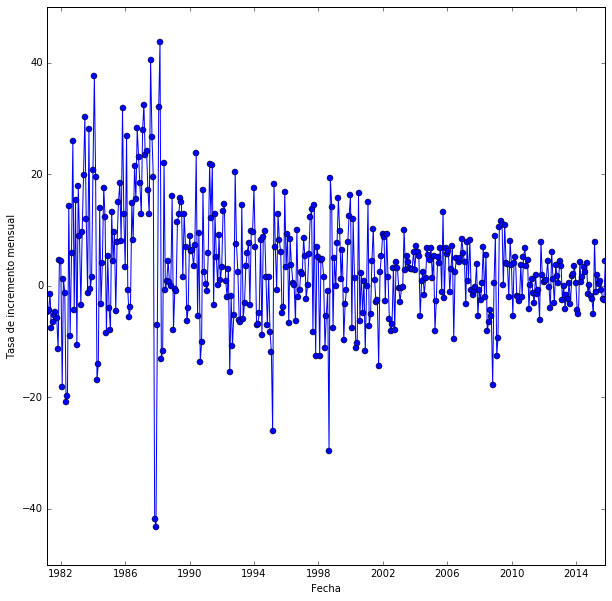

In [7]:
plt.plot(data['Fecha'],data['Tasa de crecimiento mensual'], '-o')
plt.xlabel('Fecha')
plt.ylabel('Tasa de incremento mensual')

In [157]:
net = bn(12,3,1)

In [158]:
def createNeuralData(rawData,degree):
    neural_data = data[degree:]
    neural_data = neural_data.reset_index(drop=True)
    for i in range(0,degree):
        text = "-" + str(i+1)
        var = rawData[(degree-(i+1)): (len(rawData)-(i+1))]
        var = var.reset_index(drop=True)
        var
        neural_data[text] = var
    return neural_data

In [159]:
neural_data = createNeuralData(data['Tasa de crecimiento mensual'],12)

In [160]:
neural_data[:10]

,Fecha,Tasa de crecimiento mensual,-1,-2,-3,-4,-5,-6,-7,-8,-9,-10,-11,-12
0,1982-02-28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63,-5.26,-6.56,-7.58,-1.49,-4.29,-4.76
1,1982-03-31,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63,-5.26,-6.56,-7.58,-1.49,-4.29
2,1982-04-30,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63,-5.26,-6.56,-7.58,-1.49
3,1982-05-31,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63,-5.26,-6.56,-7.58
4,1982-06-30,14.29,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63,-5.26,-6.56
5,1982-07-31,-8.93,14.29,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63,-5.26
6,1982-08-31,5.88,-8.93,14.29,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83,-4.63
7,1982-09-30,25.93,5.88,-8.93,14.29,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34,-5.83
8,1982-10-31,-4.41,25.93,5.88,-8.93,14.29,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65,-11.34
9,1982-11-30,15.38,-4.41,25.93,5.88,-8.93,14.29,-19.67,-20.78,-1.28,1.30,-18.09,4.44,4.65


In [161]:
trainNumber = int(len(neural_data.index)*0.8)
testNumber = len(neural_data.index)- trainNumber

In [163]:
columns = neural_data.columns.values[2:]
columns

array(['-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '-10', '-11',
       '-12'], dtype=object)

In [164]:
train_set = neural_data[columns][:trainNumber]
test_set = neural_data[columns][trainNumber:]